# Read the csv files


In [59]:
import pandas as pd

In [56]:
GBM = pd.read_csv("gbm_data.csv")
OPT = pd.read_csv("optical_data.csv")
LAT = pd.read_csv("lat_data.csv")
XRT = pd.read_csv("xrt_data.csv")
BAT = pd.read_csv("bat_data.csv")
VHE = pd.read_csv("vhe_data.csv")

## Plot all

In [54]:
import matplotlib.pyplot as plt

ls = "-"
color_GBM = "tab:green"
color_OPT = "tab:purple"
color_LAT = "tab:blue"
color_Swift = "tab:grey"
color_VHE = "tab:red"

gbmkwargs     = { 'fmt': '', 'color': color_GBM , 'linestyle':ls, 'alpha':1.0 }
opticalkwargs = { 'fmt':'.', 'color': color_OPT , 'linestyle': '', 'markersize' : 7}
latkwargs     = { 'fmt': '.', 'color': color_LAT , 'linestyle':'', 'alpha': 1.0, 'markersize' : 7 }
swiftkwargs   = { 'fmt': '', 'color': color_Swift , 'linestyle':'', 'alpha':1.0, 'linewidth':2.0 }
batkwargs     = { 'fmt': '', 'color': color_Swift , 'linestyle':'', 'alpha':1.0, 'linewidth':1.0 }
vhekwargs     = { 'fmt': '', 'color': color_VHE , 'linestyle':'', 'markersize': 8, 'zorder' : 50}

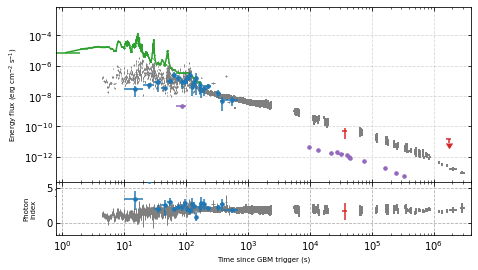

In [58]:
fig = plt.figure(figsize=(18.3/2.54,12.4/2.54))

ax1 = fig.add_axes((.15,.3,.8,.5))

ax1.errorbar(x = GBM["time"], y = GBM["Eflux"], xerr = [ GBM["time"] - GBM["time_d"], GBM["time_u"]-GBM["time"] ], yerr = GBM["Err_Eflux"], **gbmkwargs)
ax1.errorbar(x = OPT["Time"], y = OPT["EFlux"], xerr = [ OPT["Time_err"], OPT["Time_err"]], **opticalkwargs)
ax1.errorbar(x = LAT["Time"], y = LAT['En_Flux'] , xerr = [LAT["Err_Time"],LAT["Err_Time"]], yerr = [LAT["Err_En_Flux" ],LAT["Err_En_Flux" ]] ,zorder = 30, **latkwargs)
ax1.errorbar(x = XRT["Time"], y = XRT["EFlux"], xerr = XRT["Time_err"], yerr = XRT["EFlux_err"],  zorder = 20, **swiftkwargs)
ax1.errorbar(x = BAT["Time"], y = BAT["EFlux"], xerr = BAT["Time_err"], yerr = BAT["EFlux_err"],  **batkwargs)
ax1.errorbar(x = VHE["Time"], y = VHE["EFlux"], xerr = VHE["Time_err"], yerr = VHE["EFlux_err"], uplims = VHE["is_ul"], **vhekwargs)

ax2 = fig.add_axes((.15,.15,.8,.15))

ax2.errorbar(x = LAT['Time'] , y = -1.*LAT['Index'] , xerr = [LAT["Err_Time"],LAT["Err_Time"]], yerr = [LAT["Index_d"],LAT["Index_u"]],zorder = 30, **latkwargs)
ax2.errorbar(x = XRT["Time"], y = XRT["Index"], xerr = XRT["Time_err"], yerr = XRT["Index_err"],  zorder = 20, **swiftkwargs)
ax2.errorbar(x = BAT["Time"], y = BAT["Index"], xerr = BAT["Time_err"], yerr = BAT["Index_err"],  **batkwargs)
ax2.errorbar(x = VHE["Time"], y = VHE["Index"], xerr = VHE["Time_err"], yerr = VHE["Index_err"], uplims = VHE["is_ul"], **vhekwargs)


#estetica
ax2.tick_params('both',which = 'both',direction = 'in',bottom = True, top =True,right = True, left = True, grid_linestyle = '--')
ax2.set_xscale('log')
ax2.set_xlim(0.8,4e6)
ax2.set_ylim(-1.8,5.8)
ax2.grid()
ax2.set_ylabel("Photon\nindex", labelpad = 10, fontsize = 7)
ax2.set_xlabel("Time since GBM trigger (s)", fontsize = 7)

ax1.set_ylabel(r'Energy flux (erg cm$^{-2}$ s$^{-1}$)', fontsize = 7)
ax1.set_xlim(0.8,4e6)
ax1.set_ylim(2e-14,8e-3)
ax1.tick_params('both',which = 'both',direction = 'in',bottom = True, top =True, right = True, left = True,grid_linestyle = '--', grid_alpha = 0.5)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.grid()